# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results)
merge_df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count = mouse_metadata["Mouse ID"].value_counts()
count

k403    1
p438    1
o523    1
o562    1
o725    1
       ..
e227    1
e291    1
e476    1
e584    1
z969    1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

print(merge_df[merge_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique())
print(merge_df)

['g989']
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2  

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df[merge_df['Mouse ID']!= 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
len(merge_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group = merge_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats_dict = {}

summary_stats_dict["mean"] = drug_regimen_group["Tumor Volume (mm3)"].mean()
summary_stats_dict["median"] = drug_regimen_group["Tumor Volume (mm3)"].median()
summary_stats_dict["variance"] = drug_regimen_group["Tumor Volume (mm3)"].var()
summary_stats_dict["standard deviation"] = drug_regimen_group["Tumor Volume (mm3)"].std()
summary_stats_dict["SEM"] = drug_regimen_group["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame(summary_stats_dict)
summary_stats_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_group.agg([np.mean, np.median, np.var, np.std, st.sem])["Tumor Volume (mm3)"]

C:\Users\cayla\AppData\Local\Temp\ipykernel_9536\1362589640.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drug_regimen_group.agg([np.mean, np.median, np.var, np.std, st.sem])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

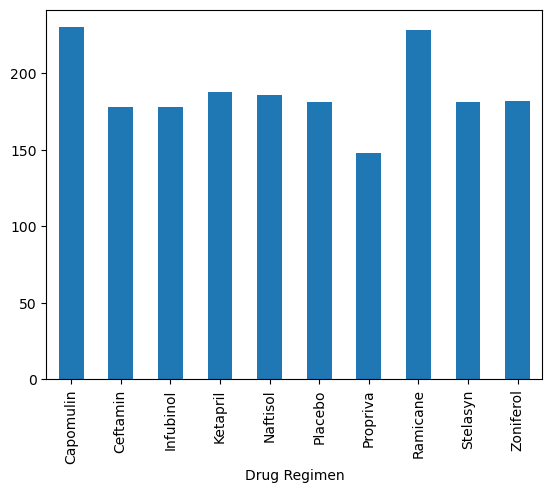

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = merge_df.groupby('Drug Regimen').count()
drug_regimen_counts['Mouse ID'].plot.bar()

<BarContainer object of 10 artists>

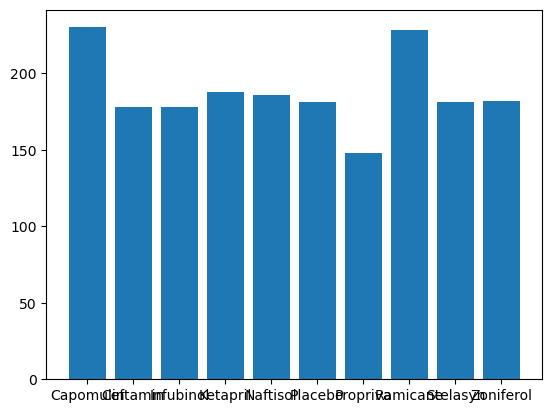

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x = drug_regimen_counts.index, height = drug_regimen_counts['Mouse ID'])

<Axes: ylabel='Mouse ID'>

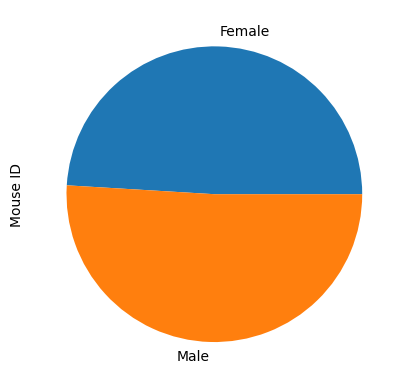

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merge_df.groupby('Sex').count()['Mouse ID'].plot.pie()

[922, 958]


([<matplotlib.patches.Wedge at 0x1f24908d600>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')])

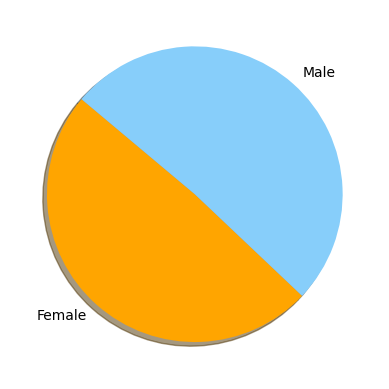

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = list(merge_df.groupby('Sex')['Mouse ID'].count())
print(sizes)

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]
# Tells matplotlib to separate the "Humans" section from the others
plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint_df = merge_df.drop_duplicates(subset = ["Mouse ID"], keep = "last")
print(last_timepoint_df["Tumor Volume (mm3)"])

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_by_dr = last_timepoint_df[(last_timepoint_df["Drug Regimen"]=="Capomulin")|(last_timepoint_df["Drug Regimen"]=="Ramicane")|(last_timepoint_df["Drug Regimen"]=="Infubinol")|(last_timepoint_df["Drug Regimen"]=="Ceftamin")]
tumor_volume_by_dr
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1859    45.934712
1862    48.710661
1872    62.754451
1882    65.741070
1892    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = list(merge_df["Drug Regimen"])

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in merge_df["Drug Regimen"].unique():
    tumor_volume_dict[drug] = pd.DataFrame({"Tumor Volume (mm3)":[]})
    subset = merge_df[merge_df["Drug Regimen"]==drug]
    first = subset["Tumor Volume (mm3)"].sort_values().iloc[len(subset)//4]
    third = subset["Tumor Volume (mm3)"].sort_values().iloc[len(subset)*3//4]
    IQR = third-first
    IQR
    upper_bound = third+1.5*IQR
    lower_bound = first-1.5*IQR
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for idx,mouse in subset.iterrows():
        
        if lower_bound < float(mouse["Tumor Volume (mm3)"]) < upper_bound:
            print(drug)
            tumor_volume_dict[drug].loc[len(tumor_volume_dict[drug])] = mouse["Tumor Volume (mm3)"]
            
    
     # Determine outliers using upper and lower bounds
    


Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
R

Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zoniferol
Zonifer

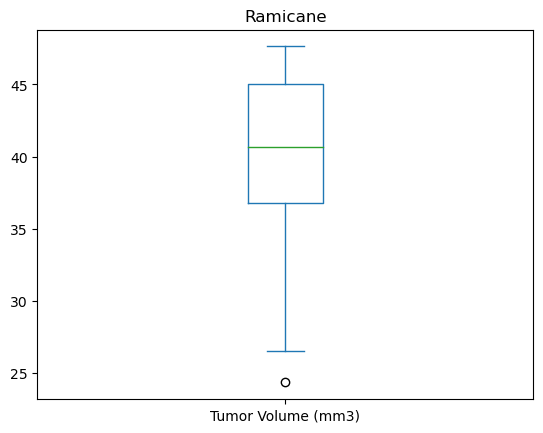

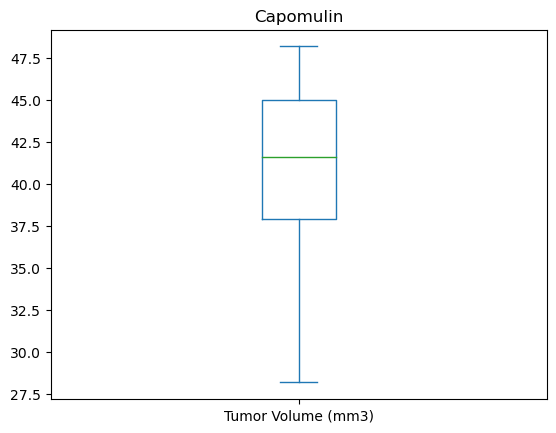

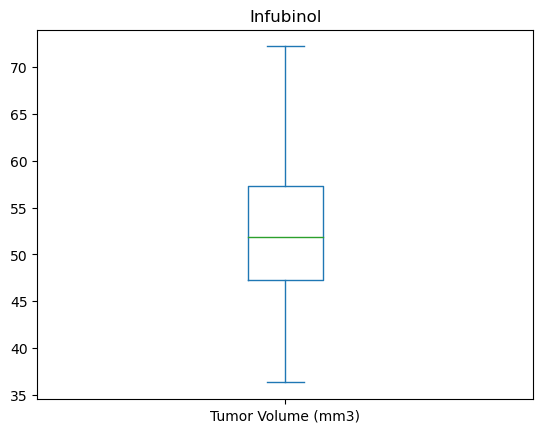

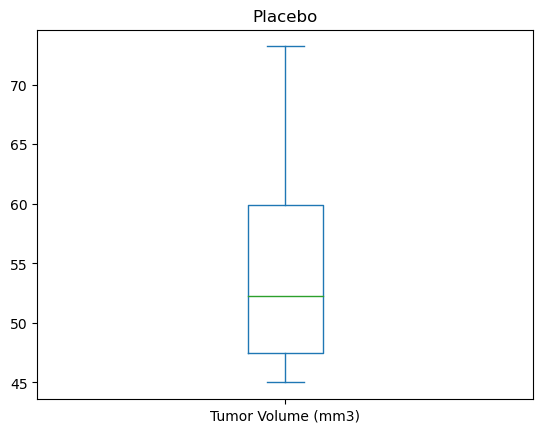

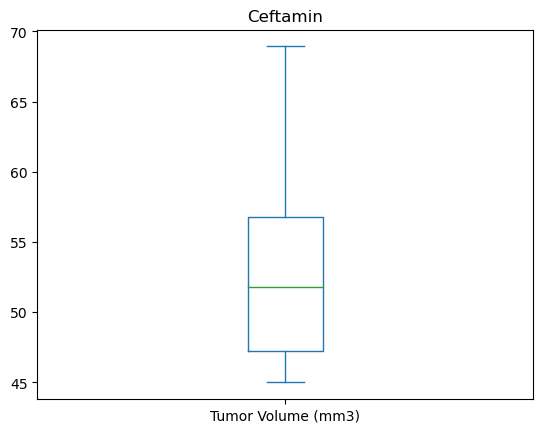

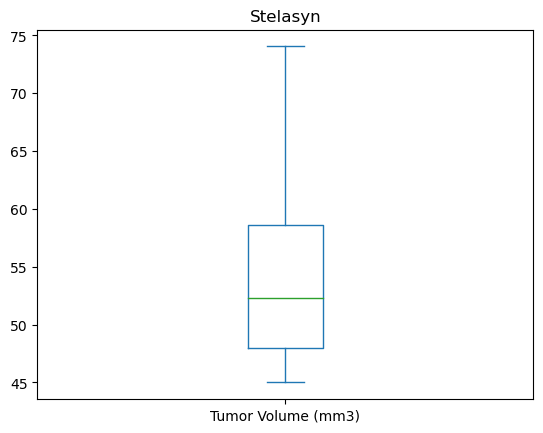

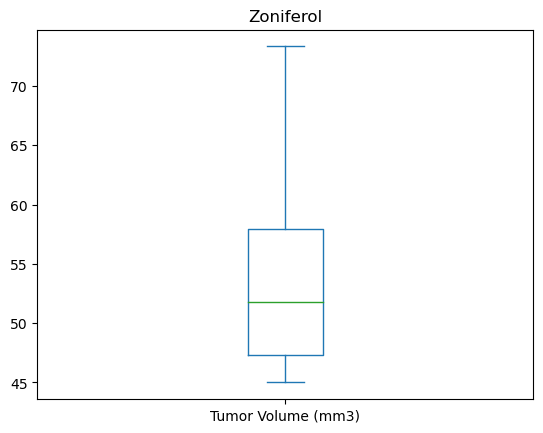

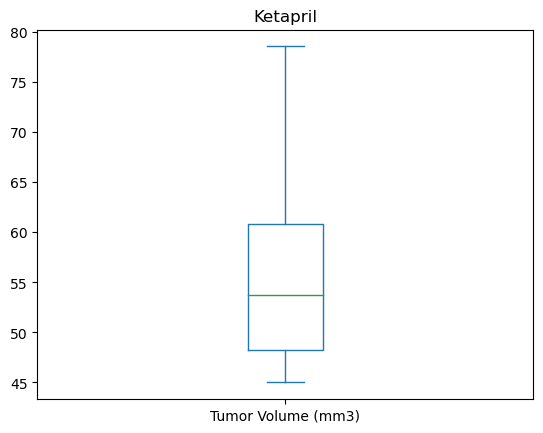

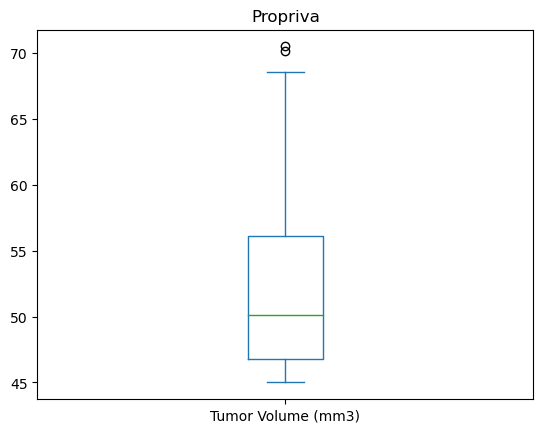

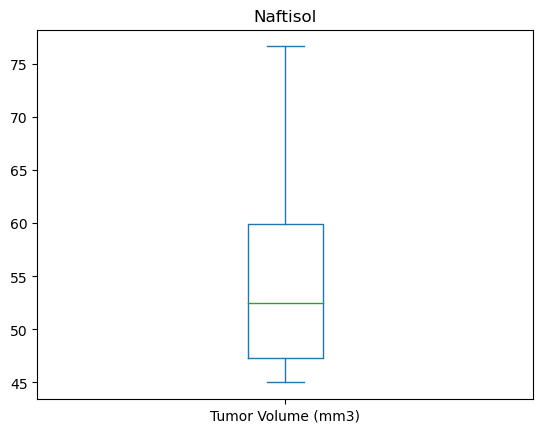

In [15]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
for df in tumor_volume_dict:
    tumor_volume_dict[df].plot(kind='box')
    plt.title(df)

## Line and Scatter Plots

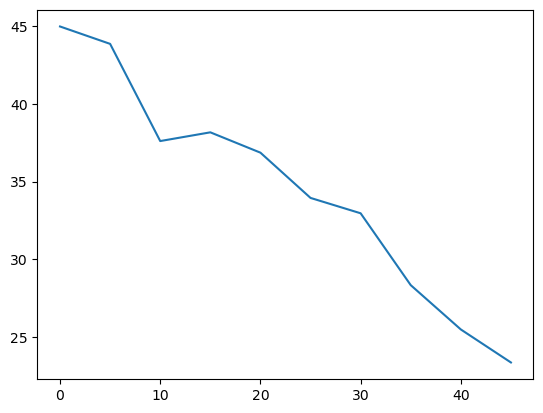

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = merge_df[(merge_df["Drug Regimen"]=="Capomulin")]
mouse = mouse[mouse["Mouse ID"]=="s185"]

plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])



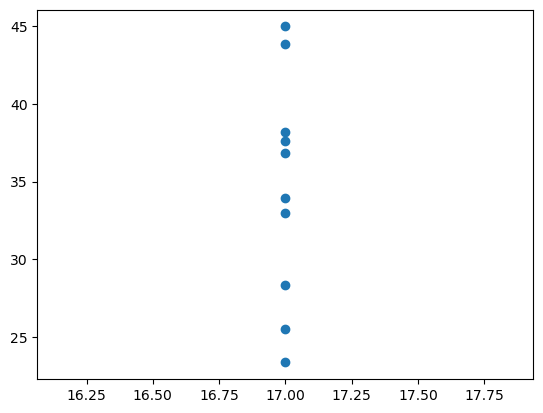

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse["Weight (g)"],mouse["Tumor Volume (mm3)"])

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(np.array(mouse["Weight (g)"]).reshape(-1,1), mouse["Tumor Volume (mm3)"])
lr.coef_

array([0.])

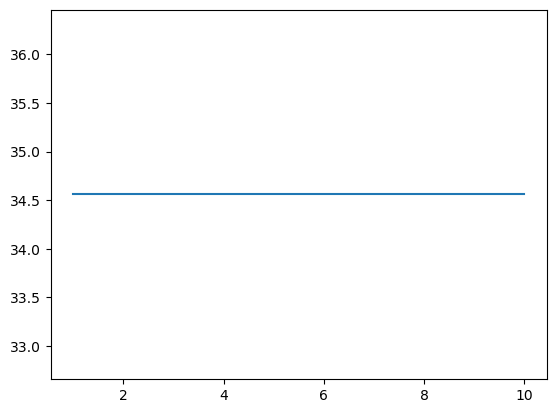

In [19]:
x = np.linspace(1,10,2)
plt.plot(x,x*lr.coef_+lr.intercept_)